## Linear Updates
##### Members:
        1. Amit Vikram Singh(111601001)
        2. Kuldeep Singh Bhandari(111601009)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


### Noise $\eta_t$ is a sequenc of identical and independent random variable.
$\eta_t$ takes value 1 or -1 with equal probability.


In [4]:
def getNoise():
    if np.random.rand()>0.5:
        return 1
    else:
        return -1

### PART1A: Find mean of $\eta_t$ using averaging of noise($\eta_t$)
## $\theta_t = \frac{\eta_1 + \eta_2 + \eta_3 + ..... + \eta_t}{n}$

In [5]:
rounds = 1000
noise = np.asarray([getNoise() for i in range(rounds)])
noise_cum = np.cumsum(noise)

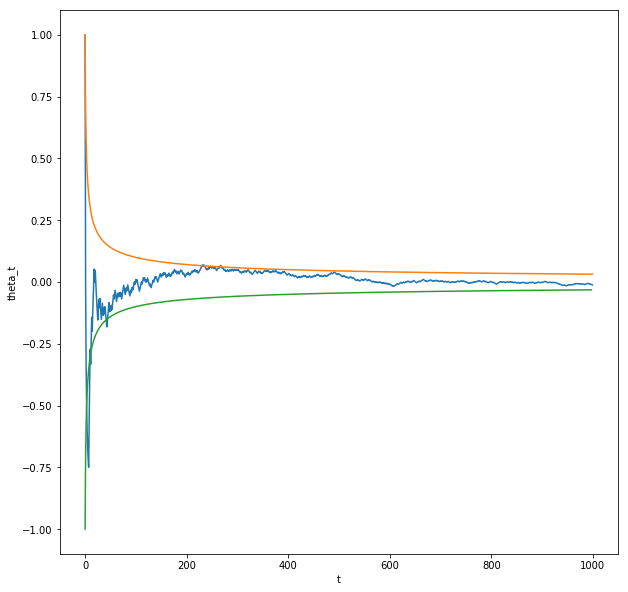

In [6]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, xlabel = 't', ylabel = 'theta_t')
ax1.plot([noise_cum[i - 1]/i for i in range(1, rounds + 1)])
ax1.plot([np.sqrt(1/i) for i in range(1, rounds + 1)])
ax1.plot([-np.sqrt(1/i) for i in range(1, rounds - 1)])

### PART1B: Approximation of mean using recursive linear update
## $\theta_t = \theta_{t - 1} + \alpha_t*(\eta_t - \theta_{t - 1})$
where $\alpha_t = \frac{1}{t+k}$
> This update finally converges to $\theta_*$ which is mean of $\eta_t$

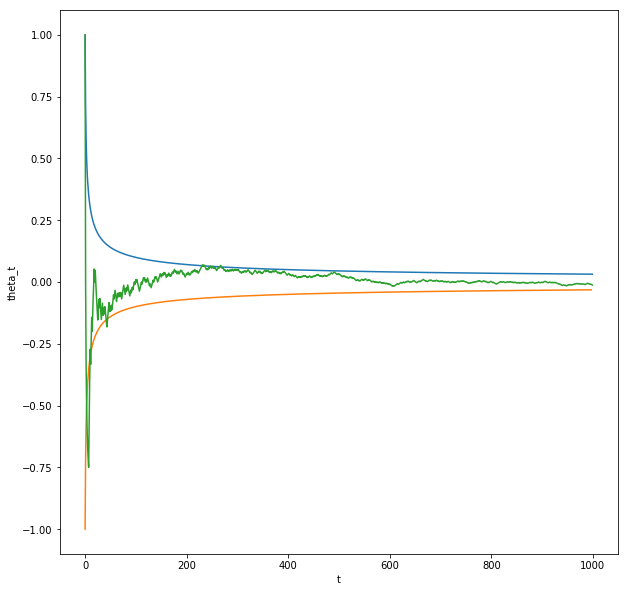

In [7]:
rounds = 1000
theta_t = np.asarray([0 for i in range(rounds + 1)], dtype = np.float32)
for t in range(1, rounds + 1):
    theta_t[t] = theta_t[t - 1] + (1/ t)*(noise[t - 1] - theta_t[t - 1])
    
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111, ylabel = "theta_t", xlabel = 't')
ax1.plot([np.sqrt(1/i) for i in range(1, rounds + 1)])
ax1.plot([-np.sqrt(1/i) for i in range(1, rounds - 1)])
ax1.plot(theta_t[1:])

In [8]:
def avgUpdate1(k = 0, theta_star = 0, rounds = 1000, theta_t = None, noise = None):
    if theta_t is None:
        theta_t = np.asarray([0 for i in range(rounds + 1)], dtype = np.float32)
    for t in range(1, rounds + 1):
        alpha = 1/ (t+k)
        theta_t[t] = theta_t[t - 1] +  alpha*(noise[t - 1] +theta_star - theta_t[t - 1])
    
    return theta_t


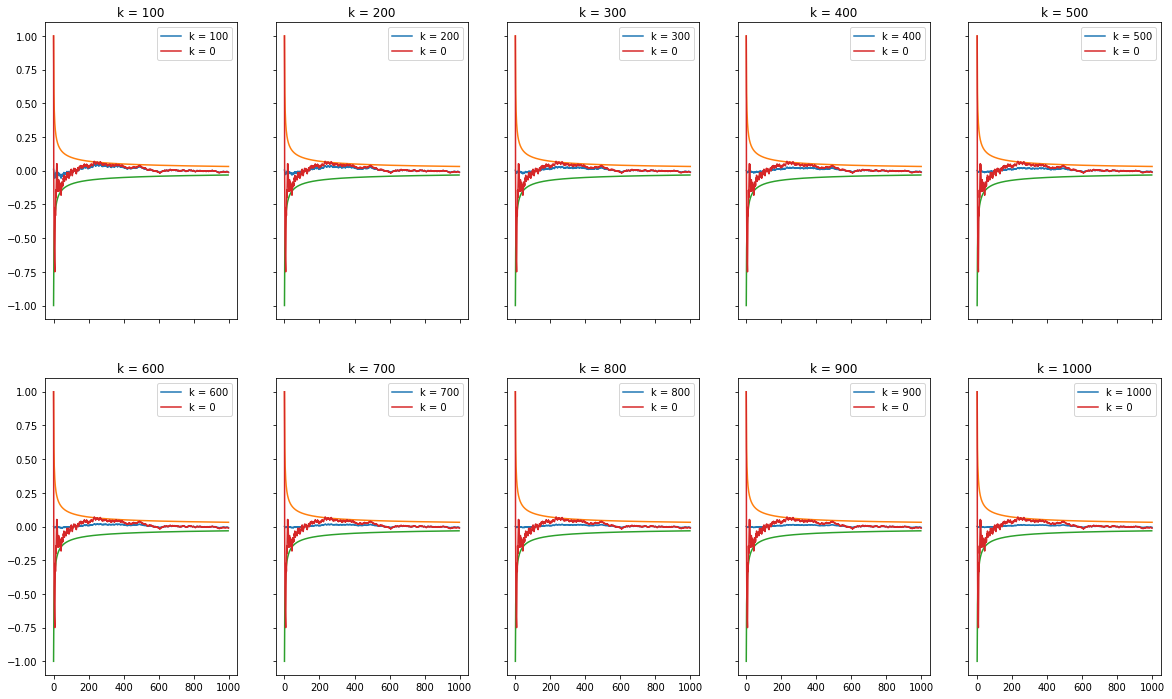

In [9]:
fig, ax = plt.subplots(2, 5, sharex = 'col', sharey = 'row')
fig.set_size_inches((20, 12))
theta_0 = avgUpdate1(k = 0, noise = noise)
for k in range(10):
    theta_t = avgUpdate1(k = (k+1)*100, noise = noise)
    ax[k//5][k%5].plot(theta_t[1:],  label = 'k = '+str((k+1)*100))
    ax[k//5][k%5].set_title("k = "+str((k+1)*100))
    
    ax[k//5][k%5].plot([np.sqrt(1/(0+i)) for i in range(1, rounds + 1)])
    ax[k//5][k%5].plot([-np.sqrt(1/(0+i)) for i in range(1, rounds - 1)])
    
    #k = 0
    ax[k//5][k%5].plot(theta_0[1:], label = 'k = 0')
    ax[k//5][k%5].legend()

### PART1C: Approximation of mean using recursive linear update and constant $\alpha_t$
## $\theta_t = \theta_{t - 1} + \alpha_t*(\eta_t - \theta_{t - 1})$
where $\alpha_t \in \{2, 1, 0.1, 0.01\}$
> This update finally converges to $\theta_*$ which is mean of $\eta_t$

In [10]:
def avgUpdate2(alpha_t = 0.1, theta_star = 0, rounds = 1000, theta_t = None, noise = None):
    if theta_t == None:
        theta_t = [0 for i in range(rounds + 1)]
    for t in range(1, rounds + 1):
        theta_t[t] = theta_t[t - 1] + alpha_t*(noise[t - 1] + theta_star - theta_t[t - 1])
        
    return theta_t

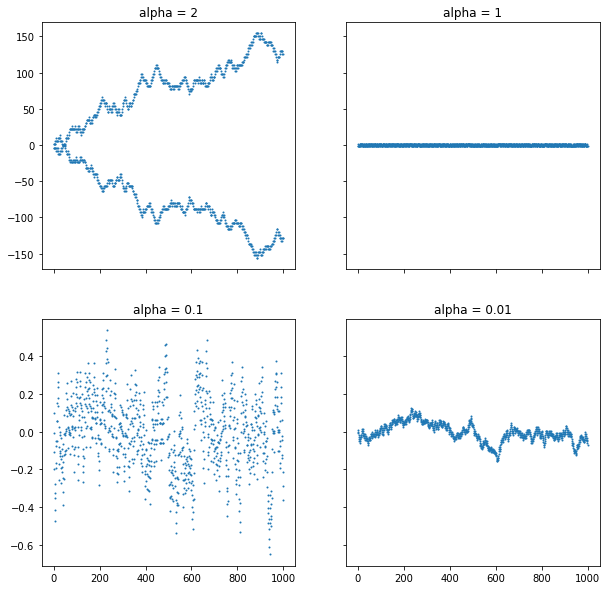

In [11]:
alpha = [2, 1, 0.1, 0.01]
fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row')
fig.set_size_inches(10, 10)
for (ind, alpha_t) in enumerate(alpha):
    theta_t = avgUpdate2(alpha_t = alpha_t, noise = noise)
    ax[ind//2][ind%2].scatter(np.arange(rounds), theta_t[1:], s = 1)
    ax[ind//2][ind%2].set_title("alpha = "+str(alpha_t))

### PART1D: Averaging and recusion with input plus some noise
> $\theta_t = \theta_{t-1} + \alpha_t*(\eta_t +  \theta_* - \theta_{t - 1})$<br/>
> $E[\eta_t] = 0$ and this recursion converges to $\theta_*$(constant)

**D1**. Learning Rate = $\alpha_t = \frac{1}{t+k} $ : Diminishing step size

In [12]:
def avgUpdate3(theta_star = 1, rounds = 1000, theta_t = None, noise = None):
    fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row')
    fig.set_size_inches(10, 10)
    theta_0 = avgUpdate1(k = 0, theta_star = theta_star, noise = noise)
    for k in range(1, 5):
        theta_t = avgUpdate1(k = k*10, theta_star = theta_star, noise = noise)
        row = (k - 1)//2
        col = (k - 1)%2
        ax[row][col].plot(theta_t[1:], label = "k = "+str(k*10))
        ax[row][col].plot(theta_0[1:], label = "k = 0")
        ax[row][col].set_title("k = "+str(k *200))
        ax[row][col].legend()

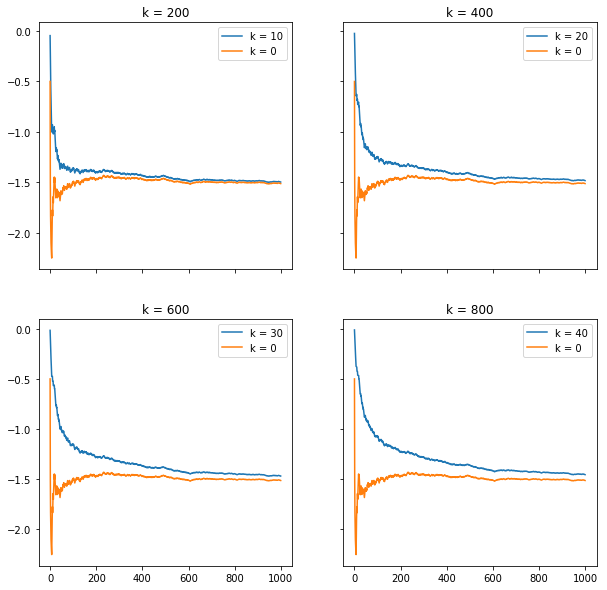

In [13]:
avgUpdate3(theta_star= -1.5, noise = noise)

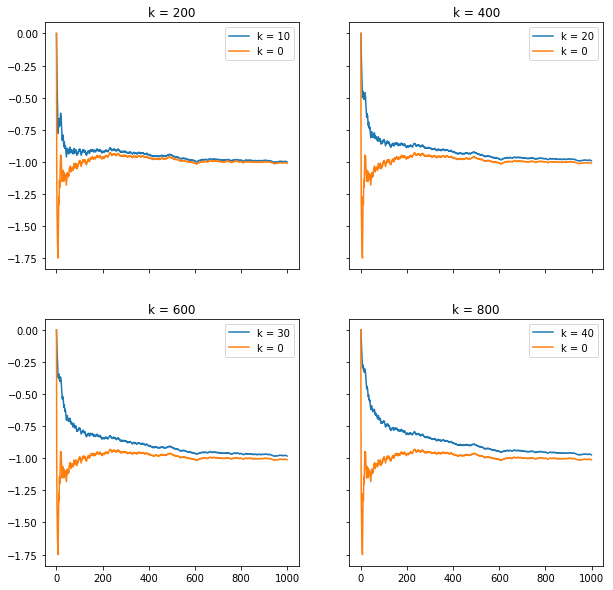

In [14]:
avgUpdate3(theta_star= -1,noise = noise)

#### D2: $\alpha_t \in \{2, 1, 0.1, 0.01\}$: constant step size

In [15]:
def avgUpdate4(theta_star = 1, rounds = 1000, theta_t = None, noise = None):
    alpha = [2, 1, 0.1, 0.01]
    fig, ax = plt.subplots(2, 2, sharex = 'col', sharey = 'row')
    fig.set_size_inches(10, 10)
    for ind, alpha_t in enumerate(alpha):
        theta_t = avgUpdate2(alpha_t = alpha_t, theta_star = theta_star, noise = noise)
        row = (ind)//2
        col = (ind)%2
        ax[row][col].plot(theta_t[1:], label = "alpha = "+str(alpha_t))
        ax[row][col].set_title("alpha = "+str(alpha_t))
        ax[row][col].legend()

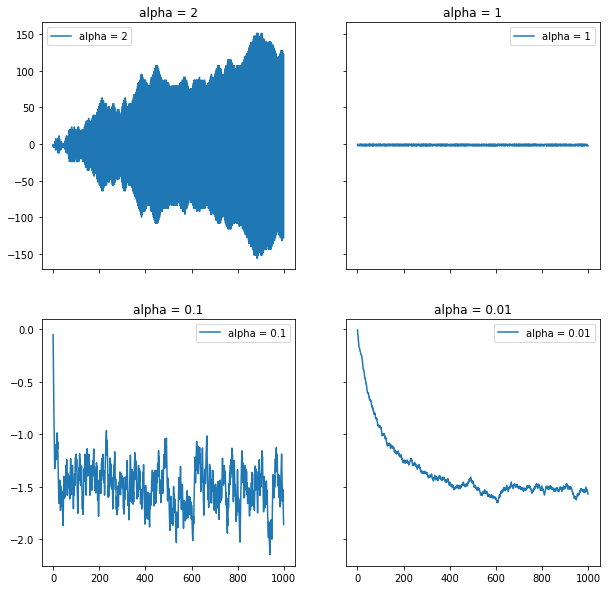

In [16]:
avgUpdate4(theta_star= -1.5, noise = noise)

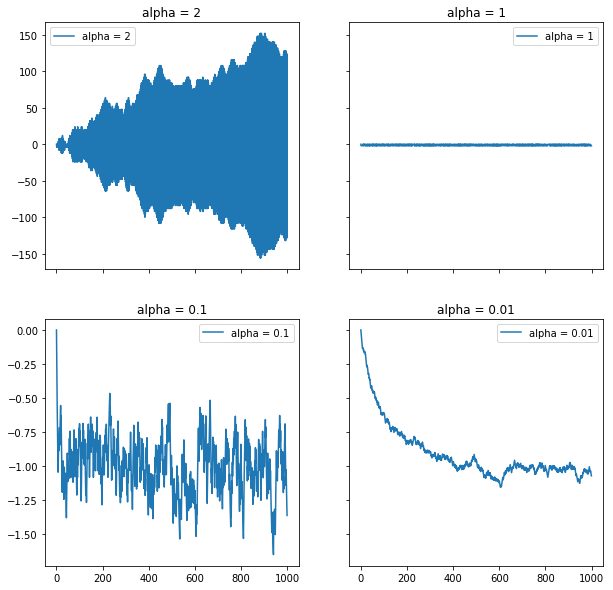

In [17]:
avgUpdate4(theta_star= -1, noise = noise)

#### PART1E: Averaging and recursion with only input and no noise
#### $\theta_t = \theta_{t-1} + \alpha_t * ( \theta_* - \theta_{t - 1})$
Recursion converges to $\theta_* = constant$ <br/>
$\alpha_t \in$ {2, 1, 0.1, 0.01}

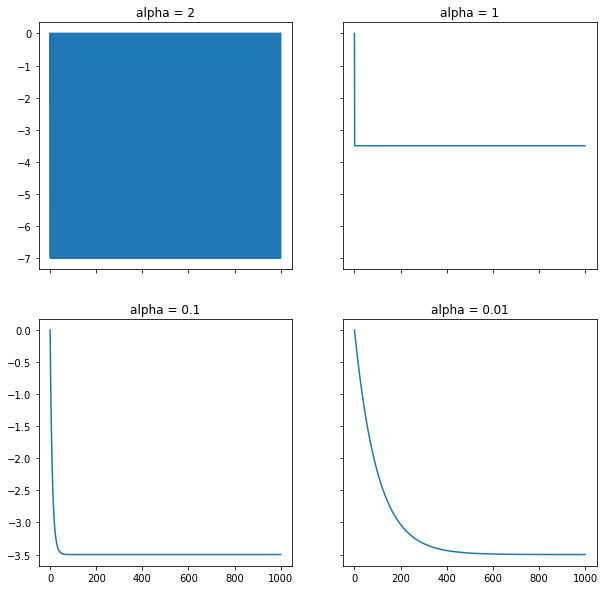

In [18]:
fig,ax = plt.subplots(2,2, sharex = 'col', sharey = 'row')
fig.set_size_inches(10, 10)
noise1 = np.zeros(noise.shape)
alpha = [2, 1, 0.1, 0.01]
for i, alpha_t in enumerate(alpha):
    theta_t = avgUpdate2(alpha_t = alpha_t, theta_star = -3.5, 
                        noise = noise1)
    row = i//2
    col = i%2
    ax[row][col].plot(theta_t[:])
    ax[row][col].set_title("alpha = "+str(alpha_t))

---

# Solving $A\theta_* = b$

In [23]:
# np.linalg.norm(noise, axis = 0)
c_tList = [10, 100, 1000]
rounds = 1000

In [258]:
def plotHelper(theta_t, alpha_t, noise = False, decay = False, 
               c = 0.1, c_t = 10, ax = ax, ind = 0):
    theta_star = theta_t[:, -1].reshape(2, 1)
    
    if decay == False:
        title = 'alpha_t = '+str(alpha_t)
    else:
        title = 'alpha_t = '+str(c)+"/("+str(c_t)+"+t)"
    if noise:
        title += ", with noise"
    
    ax[ind//3][ind%3].plot(np.linalg.norm(theta_t[:, :-1] - theta_star, axis = 0))
    ax[ind//3][ind%3].set_title(title)
    ax[ind//3][ind%3].set_xlabel('iteration')
    ax[ind//3][ind%3].set_ylabel('||e_t||')
    
def avgUpdate1(A, b, theta_t, alpha_t, noise_t = False, rounds = 1000, decay = False,
              c = 0.1, c_t = 10):
    
    for i in range(1, rounds+1):
        if decay == True:
            alpha_t = (c/(i + c_t))
            
        if noise_t == False:
            noise = np.zeros(b.shape, dtype = np.float32)
        else:
            noise = np.array([getNoise(), getNoise()], dtype = np.float32).reshape(b.shape)
        theta_t[:, i:i+1] = theta_t[:, i - 1:i] + alpha_t*(b - np.dot(A, theta_t[:, i - 1:i]))
    
    return theta_t

def linearUpdate(A, b, alpha):
    alpha_t = alpha
    fig, ax = plt.subplots(3, 3, sharex = 'col', sharey = 'row')
    fig.set_size_inches(12, 9)
    theta_0 = np.zeros((2, rounds))
    ind = 0
    theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = False,
                         rounds = rounds,decay = False, c = None, c_t = None)
    
#     for i in range(0, 15):
#         print(i, ": ",np.dot(A, theta_t[:, i].reshape(2, 1)))
#         print(theta_t[:, i].reshape(2, 1))
    
    plotHelper(theta_t, alpha_t, noise = False, decay = False, 
               c = None, c_t = None, ax = ax, ind = ind)
    ind+=1
    theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = True,
                         rounds = rounds,decay = False, c = None, c_t = None)
    plotHelper(theta_t, alpha_t, noise = True, decay = False, 
               c = None, c_t = None, ax = ax, ind = ind)
    ind+=1
    for c_t in c_tList:
        theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = False,
                             rounds = rounds,decay = True, c = 0.1, c_t = c_t)
        plotHelper(theta_t, alpha_t, noise = False, decay = True, 
           c = 0.1, c_t = c_t, ax = ax, ind = ind)
        ind+=1
        theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = True,
                     rounds = rounds,decay = True, c = 0.1, c_t = c_t)
        plotHelper(theta_t, alpha_t, noise = True, decay = True, 
           c = 0.1, c_t = c_t, ax = ax, ind = ind)
        ind+=1

### Part1
$A = \begin{bmatrix}
   1 & 0\\
   0&1
   \end{bmatrix}\, b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$
   

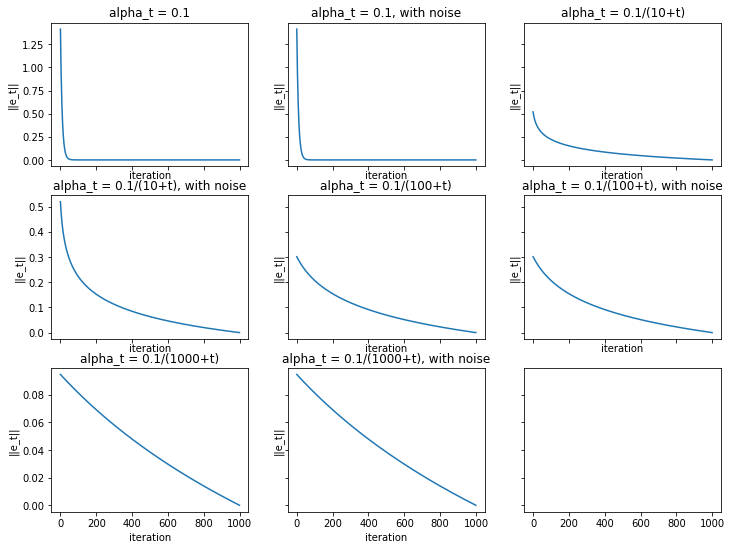

In [25]:
A = np.identity(2, dtype = np.float32)
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

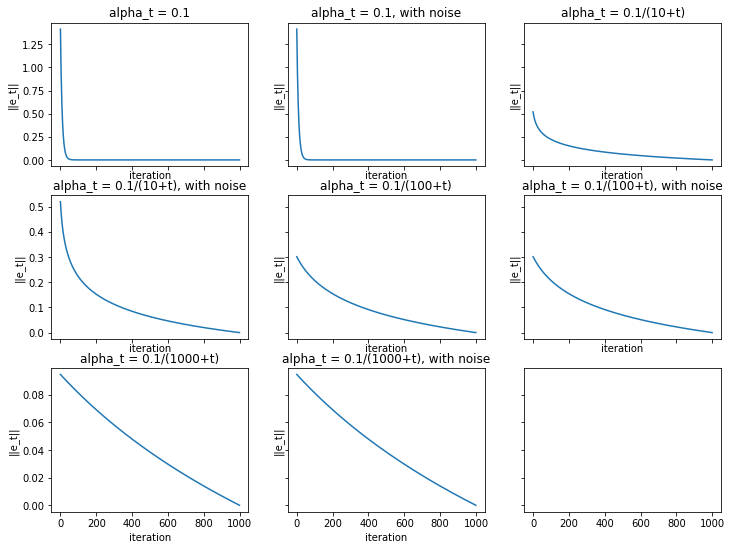

In [26]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $b = \begin{bmatrix}
   10 \\
   1\end{bmatrix}$

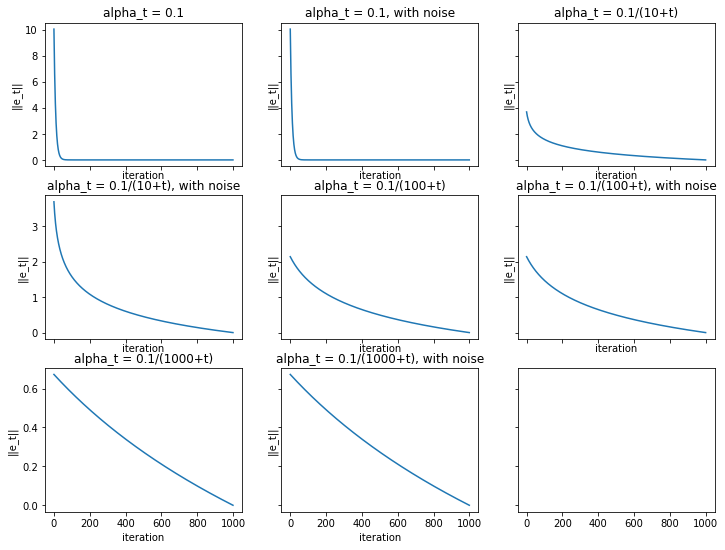

In [27]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part2
$A = \begin{bmatrix}
   2 & 0\\
   0&1
   \end{bmatrix}$
   > $b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


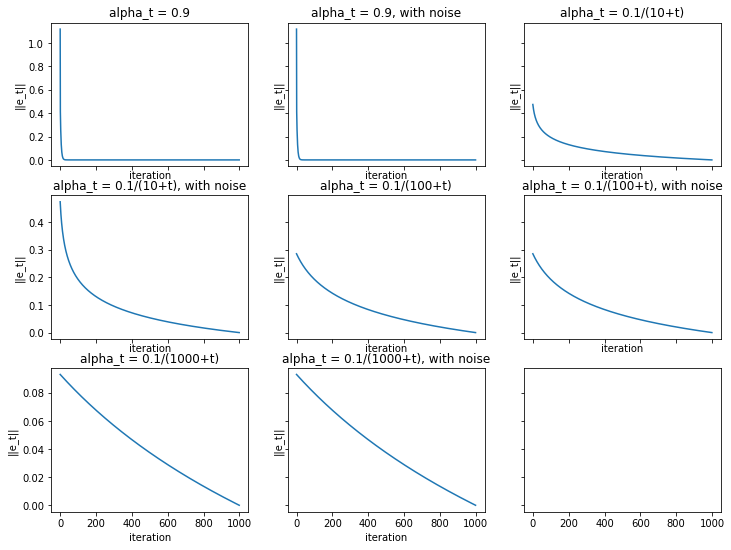

In [28]:
A = np.array([[2, 0], [0, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.9)

   > $b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

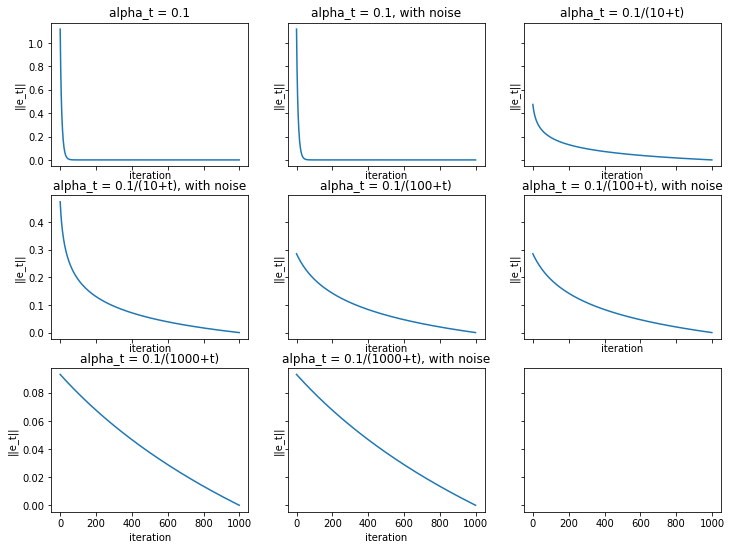

In [29]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $b = \begin{bmatrix}
   10 \\
   1\end{bmatrix}$

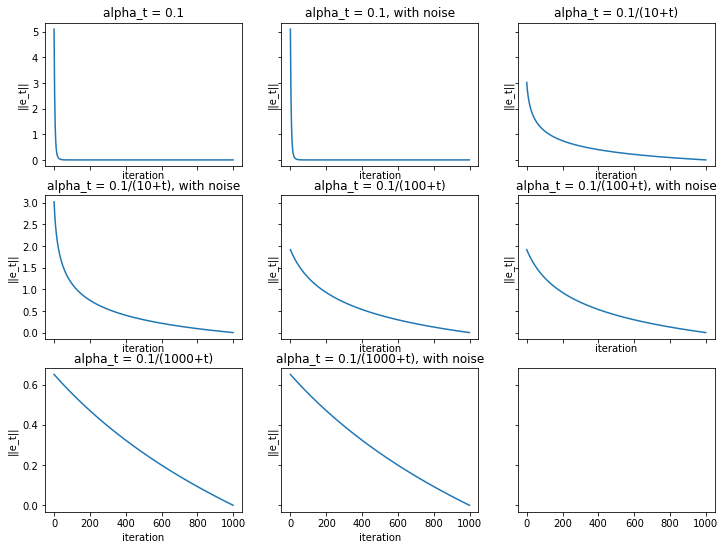

In [30]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part3
$A = \begin{bmatrix}
   1 & 0\\
   0&2
   \end{bmatrix}$
   > $ b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


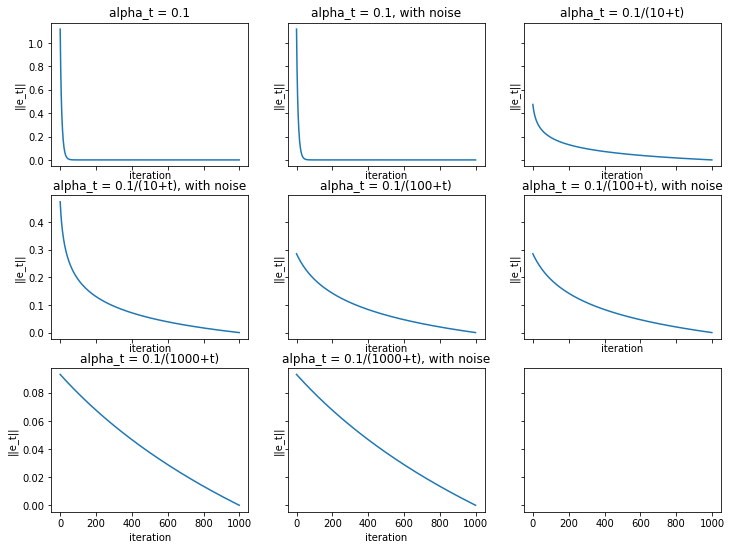

In [31]:
A = np.array([[1, 0], [0, 2]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

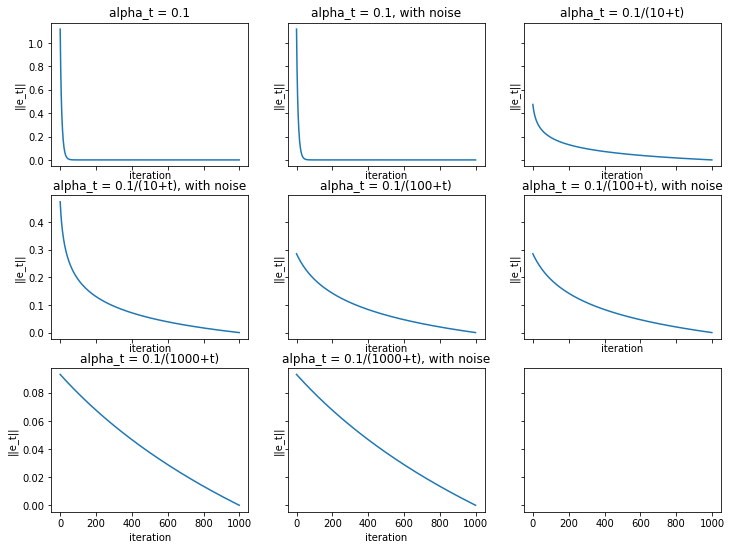

In [32]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

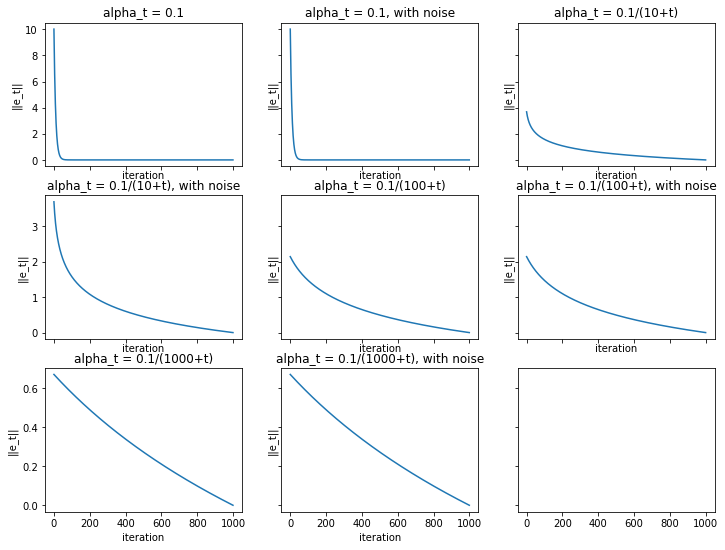

In [33]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part4
$A = \begin{bmatrix}
   1 & 0.1\\
   -0.1&1
   \end{bmatrix}$
   > $b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


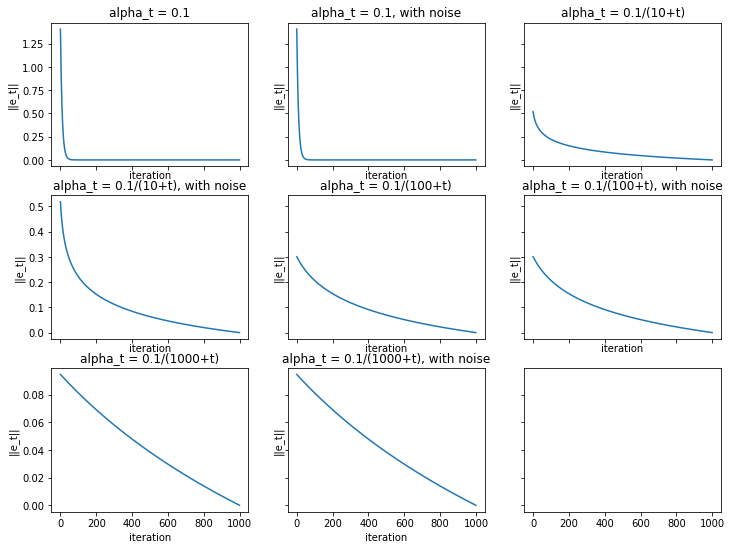

In [34]:
A = np.array([[1, 0.1], [-0.1, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

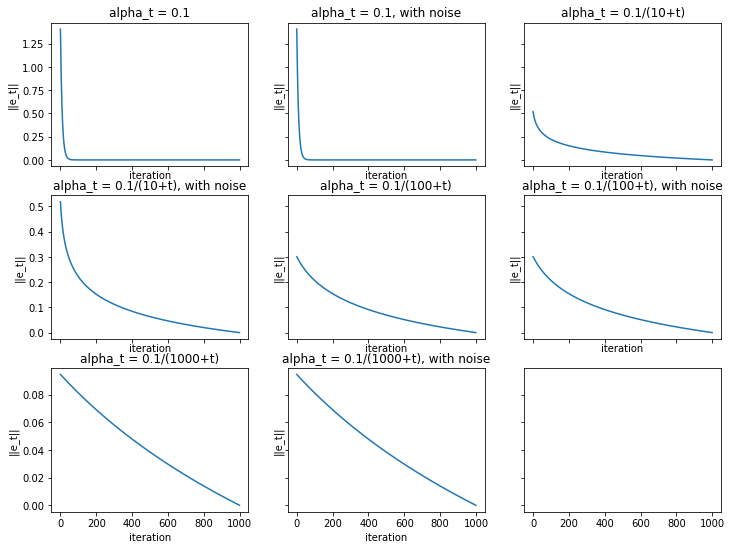

In [35]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

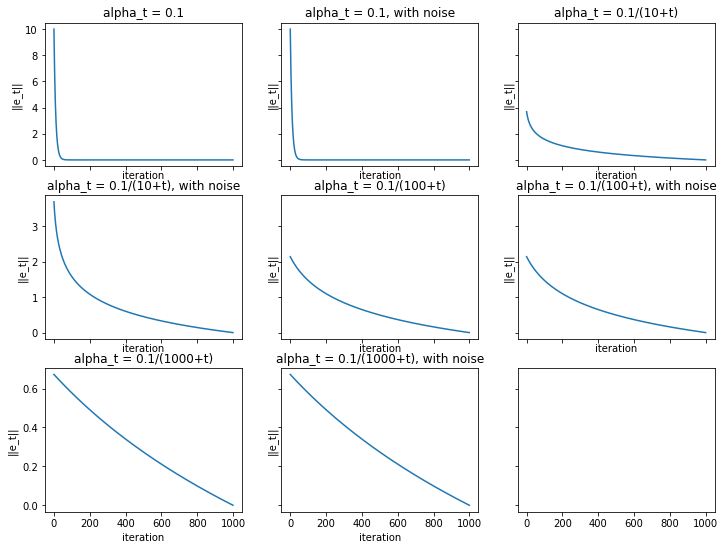

In [36]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part5
$A = \begin{bmatrix}
   1 & 1\\
   -1&1
   \end{bmatrix}$
   > $b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


In [37]:
np.linalg.eig(A)

(array([1.+0.1j, 1.-0.1j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

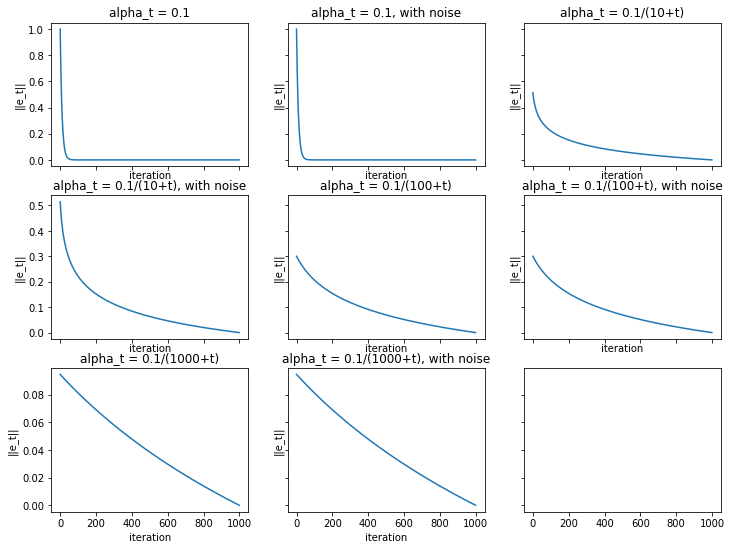

In [38]:
A = np.array([[1, 1], [-1, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

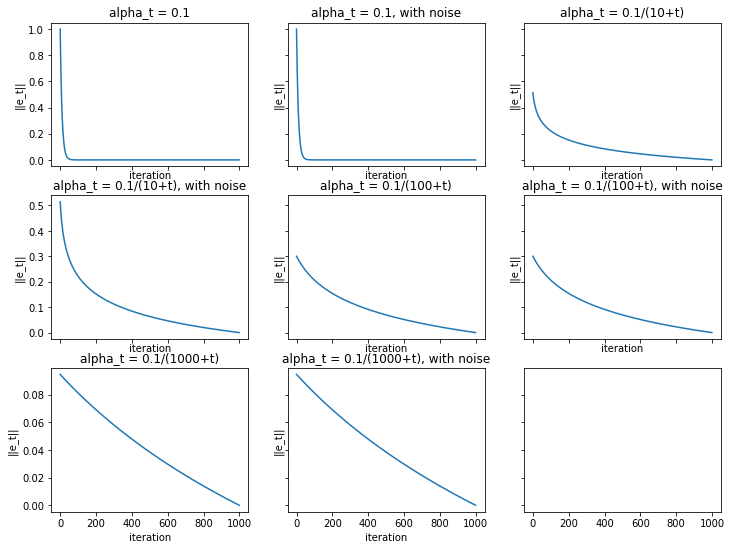

In [39]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

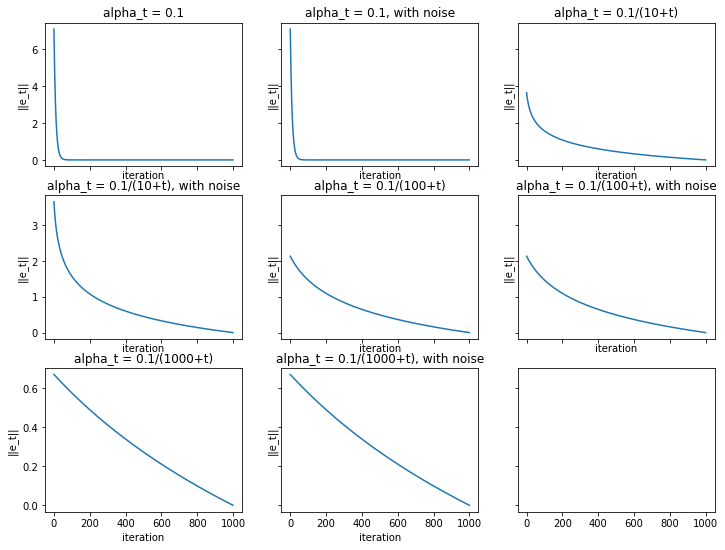

In [40]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part6
$A = \begin{bmatrix}
   1 & 10\\
   -10&1
   \end{bmatrix}$
   > $ b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


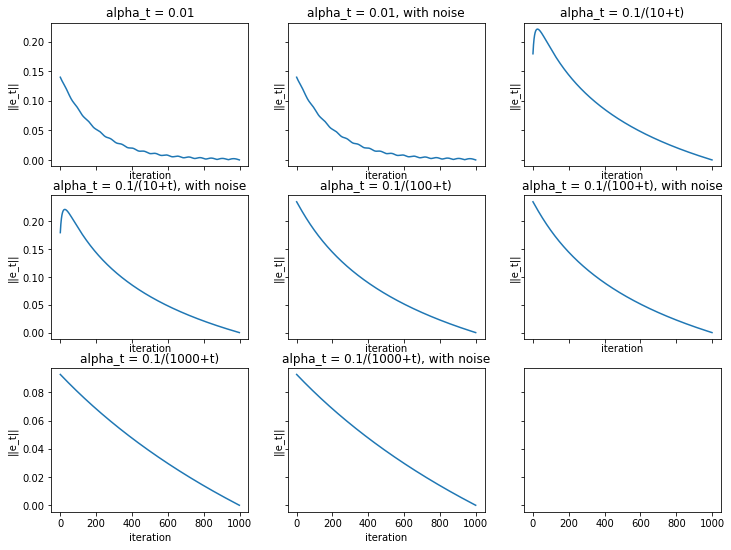

In [42]:
A = np.array([[1, 10], [-10, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.01)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

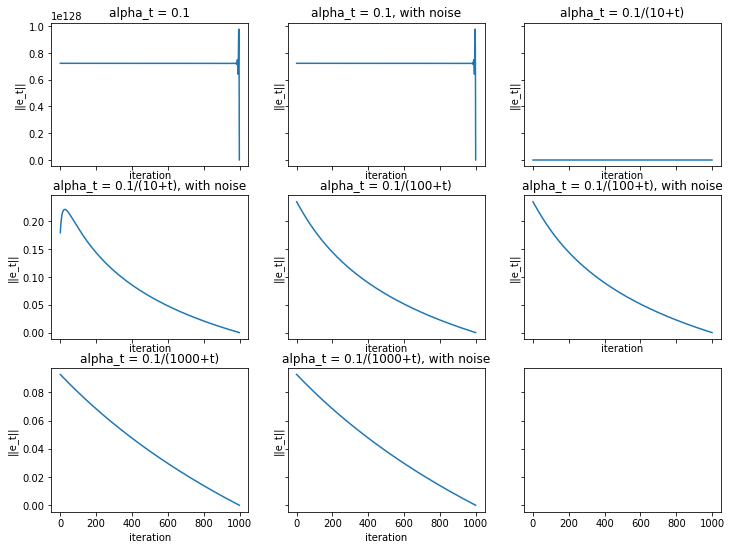

In [43]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

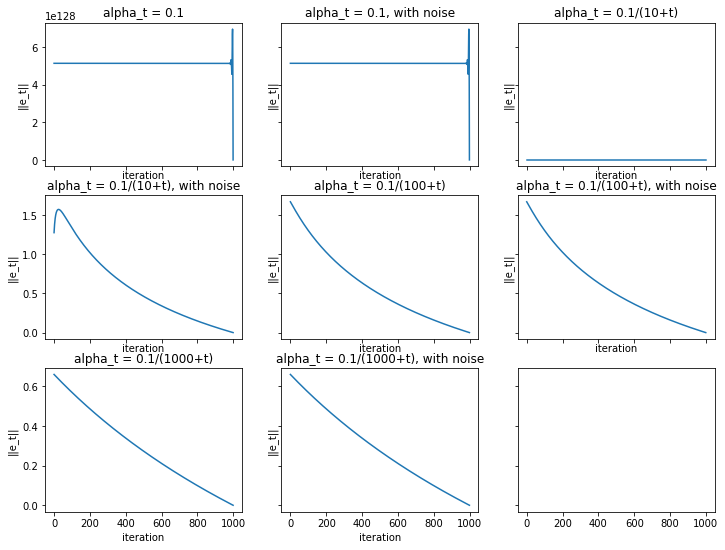

In [44]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Part7
$A = \begin{bmatrix}
   1 & 10\\
   10&1
   \end{bmatrix}$
   > $b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


In [270]:
### EXPERIMENT:
# U = np.linalg.eig(A)[1]
# U_inv = U.T
# # print(U_inv)
# # print(U)
# e0 = np.array([[-0.09090909], [-0.09090909]])
# D = np.diag(np.linalg.eig(A)[0])
# print(np.identity(2) - 0.1*D)
# X = np.power(np.identity(2) - 0.1*D, 4)
# print(X)
# # print(np.dot(U, np.dot(D, U_inv)))
# temp = np.dot(U, X)
# temp = np.dot(temp, U_inv)
# print(temp)
# print(np.dot(temp, e0))

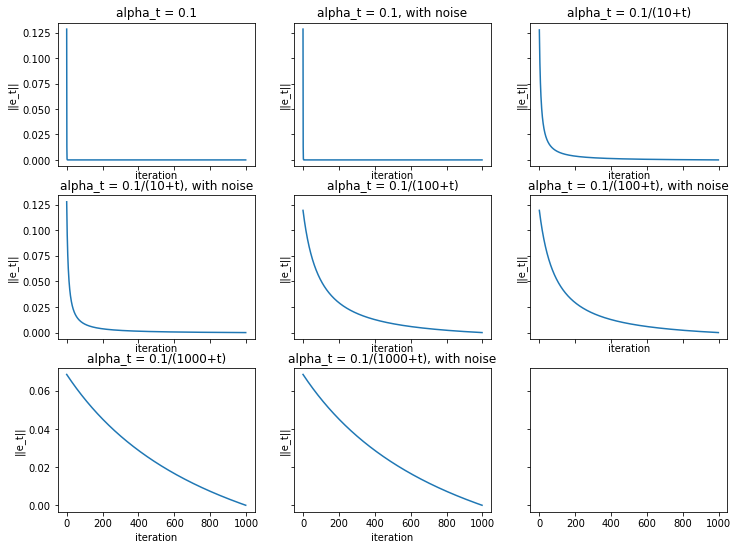

In [271]:
A = np.array([[1, 10], [10, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

[[-0.3924]
 [ 0.3924]]
[[ 0.0436]
 [-0.0436]]


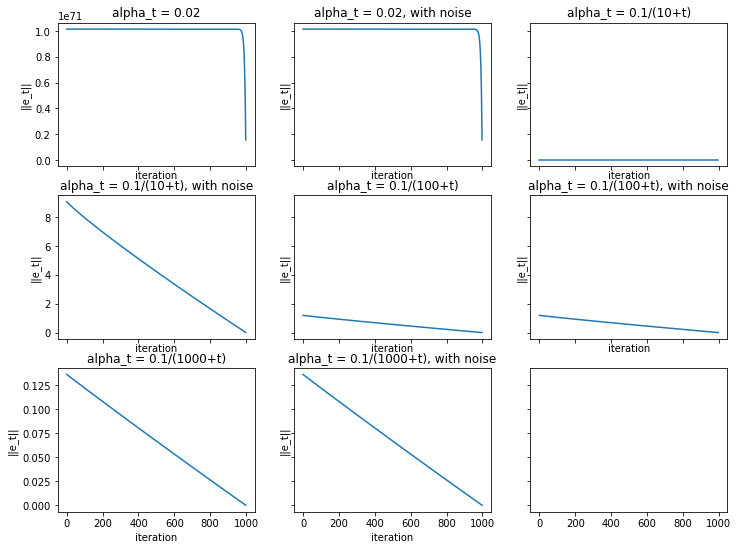

In [194]:
A = np.array([[1, 10], [10, 1]])
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.02)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

[[-1.10225977e+38]
 [ 1.10225977e+38]]
[[ 1.22473308e+37]
 [-1.22473308e+37]]


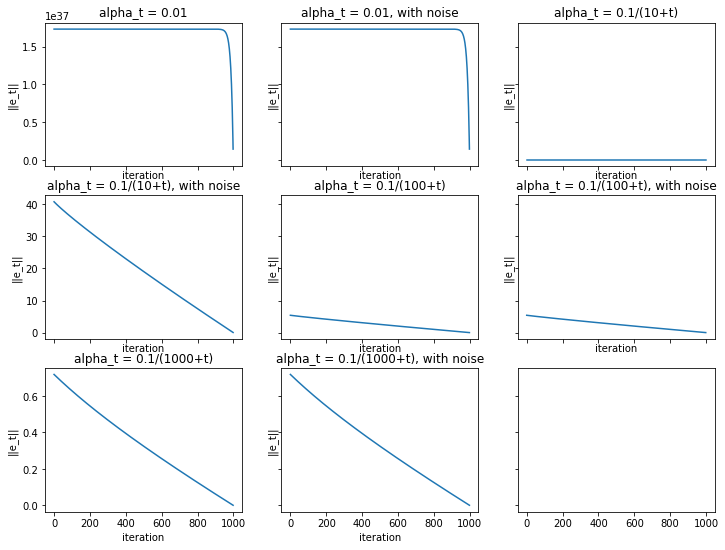

In [186]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.01)

### Part8
$A = \begin{bmatrix}
   1 & 0.1\\
   0.1&1
   \end{bmatrix}$
   > $ b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$


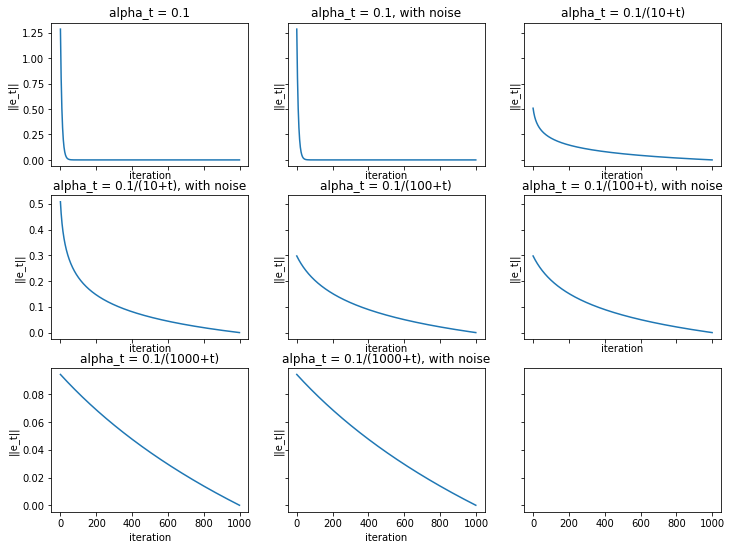

In [48]:
A = np.array([[1, 0.1], [0.1, 1]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   1 \\
   -1\end{bmatrix}$

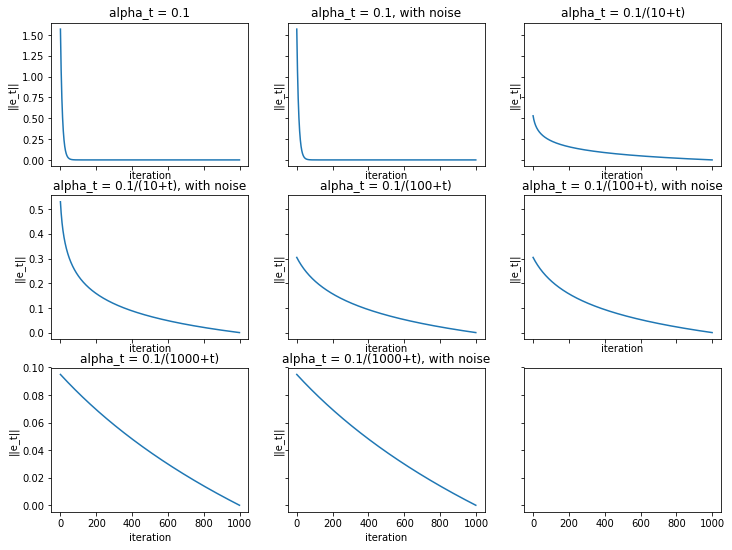

In [49]:
b = np.array([1, -1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

   > $ b = \begin{bmatrix}
   10\\
   1\end{bmatrix}$

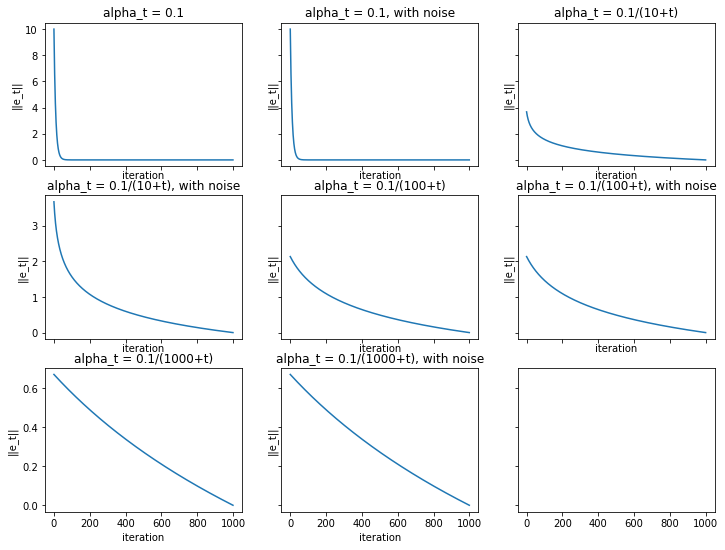

In [50]:
b = np.array([10, 1]).reshape(2, 1)
linearUpdate(A, b, 0.1)

### Plot of $(b - A*\theta)$

In [263]:
def plotHelper1(A, b, iter1,iter2, ax, theta_t, alpha):
    for i in range(iter1, iter2):
        x = theta_t[:, i:i+1]
        temp = b - np.dot(A, theta_t[:, i:i+1])
        x1 = x + alpha*temp
        ax.plot([x[0], x1[0]], [x[1], x1[1]])
#         ax.scatter([x[0]], [x[1]])
        ax.plot([x1[0]], [x1[1]], marker = '>')

In [264]:
def linearUpdate1(A, b, alpha):
    alpha_t = alpha
    thetaList = [0 for _ in range(8)]
    fig, ax = plt.subplots(3, 3, sharex = 'col', sharey = 'row')
    fig.set_size_inches(12, 9)
    rounds = 1000
    theta_0 = np.ones((2, rounds))*2
    ind = 0
    theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = False,
                         rounds = rounds,decay = False, c = None, c_t = None)
#     x = theta_t.copy()
    plotHelper1(A, b, 0, 50, ax[ind//3][ind%3], theta_t, alpha)
        
#     thetaList[ind] = theta_t.copy()
#     plotHelper(theta_t, alpha_t, noise = False, decay = False, 
#                c = None, c_t = None, ax = ax, ind = ind)
    ind+=1
    theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = True,
                         rounds = rounds,decay = False, c = None, c_t = None)
#     thetaList[ind] = theta_t.copy()
    plotHelper1(A, b, 0, 50, ax[ind//3][ind%3], theta_t, alpha)
#     plotHelper(theta_t, alpha_t, noise = True, decay = False, 
#                c = None, c_t = None, ax = ax, ind = ind)
    ind+=1
    for c_t in c_tList:
        theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = False,
                             rounds = rounds,decay = True, c = 0.1, c_t = c_t)
        plotHelper1(A, b, 400, 450, ax[ind//3][ind%3], theta_t, alpha)
#         plotHelper(theta_t, alpha_t, noise = False, decay = True, 
#            c = 0.1, c_t = c_t, ax = ax, ind = ind)
#         thetaList[ind] = theta_t.copy()
        ind+=1
        theta_t = avgUpdate1(A, b, theta_t = theta_0, alpha_t = alpha_t, noise_t = True,
                     rounds = rounds,decay = True, c = 0.1, c_t = c_t)
        plotHelper1(A, b, 400, 450, ax[ind//3][ind%3], theta_t, alpha)
#         plotHelper(theta_t, alpha_t, noise = True, decay = True, 
#            c = 0.1, c_t = c_t, ax = ax, ind = ind)
#         thetaList[ind] = theta_t.copy()
        ind+=1
    return thetaList, x

$A = \begin{bmatrix}
   1 & 10\\
   10&1
   \end{bmatrix}$
   > $ b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$
   > This is a special case of convergence.

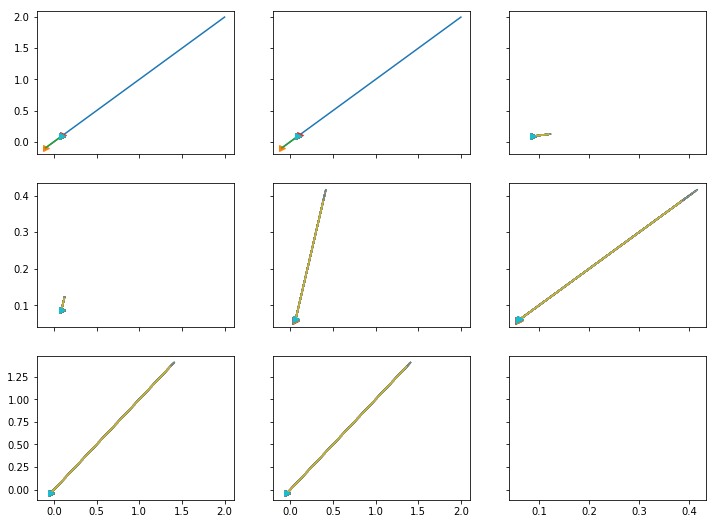

In [269]:
A = np.array([[1, 10], [10, 1]])
b = np.array([1, 1]).reshape(2, 1)
thetaList, x = linearUpdate1(A, b, 0.1)

$A = \begin{bmatrix}
   1 & 0\\
   0&2
   \end{bmatrix}$
   > $ b = \begin{bmatrix}
   1 \\
   1\end{bmatrix}$

([0, 0, 0, 0, 0, 0, 0, 0], array([[0.  , 0.4 , 0.64, ..., 1.  , 1.  , 1.  ],
        [0.  , 0.4 , 0.48, ..., 0.5 , 0.5 , 0.5 ]]))

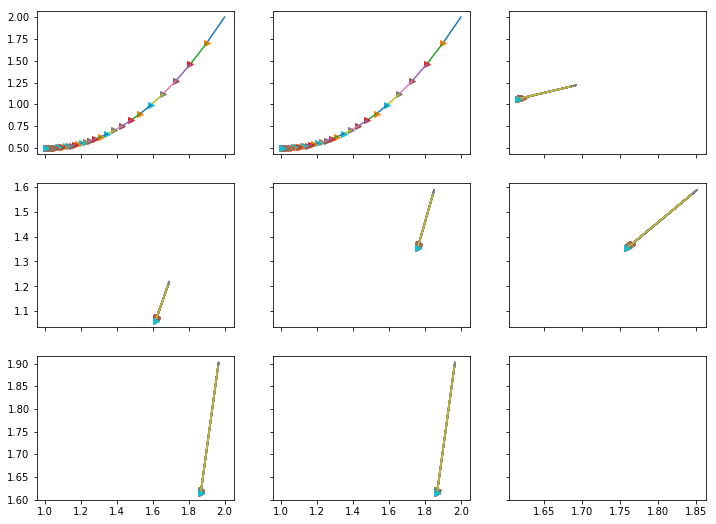

In [268]:
A = np.array([[1, 0], [0, 2]])
b = np.array([1, 1]).reshape(2, 1)
linearUpdate1(A, b, 0.1)

---